# Step 1: Installation and setup

In [1]:
!pip install --upgrade pip setuptools

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.15.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from kaggle to Colab

In [5]:
# Installing Kaggle API
! pip install -q kaggle

In [6]:
# Create a directory as kaggle
! mkdir -p ~/.kaggle

In [7]:
# Import API key to google colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [8]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [10]:
# Disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [11]:
# list of datasets
! kaggle datasets list

ref                                                            title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadehsan000/healthcare-dataset-2019-2024                  Healthcare Dataset (2019-2024)                    3MB  2024-08-09 17:52:25           3945         88  1.0              
berkayalan/paris-2024-olympics-medals                          Paris 2024 Olympics Medals                        1KB  2024-08-14 11:02:45           1839         39  1.0              
muhammadehsan000/diabetes-healthcare-dataset                   Diabetes Healthcare Dataset                      27KB  2024-08-17 19:30:34            472         26  1.0              
muhammadehsan000/olympic-games-medal-dataset-1994-2024         Olympic Games Medal Da

In [12]:
# Importing the dataset

! kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
100% 217M/218M [00:01<00:00, 238MB/s]
100% 218M/218M [00:01<00:00, 197MB/s]


In [13]:
# To use the dataset we have to unzip the dataset

# unzipping the dataset

! unzip -q /content/cat-and-dog.zip

# Step 3: Building the Model

In [14]:
# Creating an object (Initializing CNN)
model = tf.keras.models.Sequential()

In [16]:
# Adding first CNN layer (input layer)
# 1) filters = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32,32,3)

# The image we have download from kaggle.com has more dimension 32 *32 *3 but we are reducing its size
# so that the processing is faster

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same', activation='relu', input_shape = [32,32,3]))

In [17]:
# Adding maxpool layer
# 1) pool size = 2 (size of the pixels on which we have to select the features)
# 2) strides = 2 ( moving window)
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding = 'valid'))

In [18]:
# Adding second CNN layer and maxpool layer

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding = 'valid'))

In [19]:
# Converting arrays into a single vector using flattening layer

model.add(tf.keras.layers.Flatten())

In [20]:
# Adding the dropout layer
# Dropout is a regularization technique where randomly selected neurons are ignored during the training process
# Dropout layer will prevent our model from learning too much from our data

model.add(tf.keras.layers.Dropout(0.4))

In [21]:
# adding fully connected layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [22]:
# Adding output layer

# we have binary output so sigmoid function is used

model.add(tf.keras.layers.Dense(units=1, activation ='sigmoid'))

In [23]:
# Compiling the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Fitting CNN to images

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [26]:
# Rescaling Images

datagen = ImageDataGenerator(rescale= 1./255)

In [28]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32,32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size= 20)
test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32,32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size= 20)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [29]:
len(training_set), len(test_set)

(401, 102)

In [30]:
len(training_set)* 20, len(test_set)* 20

(8020, 2040)

This is because we have take a batch size 20

In [31]:
test_set.batch_size

20

In [32]:
history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)

<ipython-input-32-2b34cd491ee1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)


Epoch 1/20
401/401 [==============================] - 15s 34ms/step - loss: 0.6662 - accuracy: 0.5808 - val_loss: 0.6165 - val_accuracy: 0.6688
Epoch 2/20
401/401 [==============================] - 13s 33ms/step - loss: 0.6002 - accuracy: 0.6758 - val_loss: 0.5650 - val_accuracy: 0.7202
Epoch 3/20
401/401 [==============================] - 13s 32ms/step - loss: 0.5509 - accuracy: 0.7169 - val_loss: 0.5251 - val_accuracy: 0.7420
Epoch 4/20
401/401 [==============================] - 13s 33ms/step - loss: 0.5179 - accuracy: 0.7465 - val_loss: 0.5310 - val_accuracy: 0.7370
Epoch 5/20
401/401 [==============================] - 13s 32ms/step - loss: 0.4861 - accuracy: 0.7659 - val_loss: 0.4962 - val_accuracy: 0.7573
Epoch 6/20
401/401 [==============================] - 13s 33ms/step - loss: 0.4572 - accuracy: 0.7794 - val_loss: 0.4952 - val_accuracy: 0.7642
Epoch 7/20
401/401 [==============================] - 13s 32ms/step - loss: 0.4294 - accuracy: 0.7999 - val_loss: 0.4931 - val_accuracy:

# Step 5: plotting the learning curve

In [33]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()



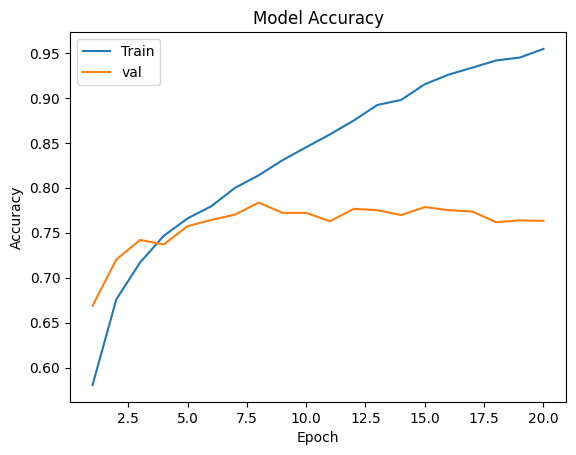

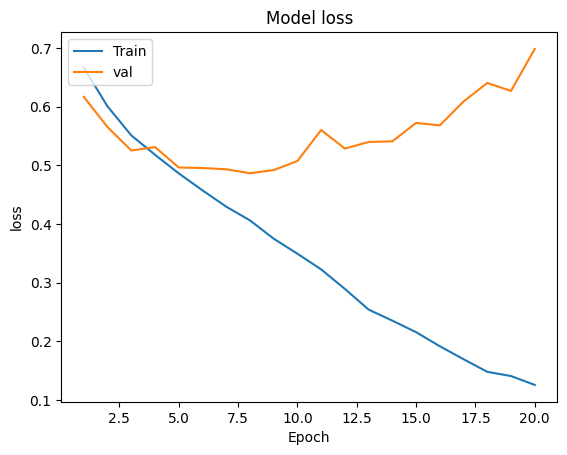

In [34]:
learning_curve(history, 20)

Model is overfitted after 5th epoch

Tarining loss is decraesing but validation loss is not decreasing continuously